In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as st
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings
warnings.filterwarnings('ignore')

In [78]:
df=pd.read_csv("DS1_C5_S3_Mtcars_Data_Practice.csv")
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,210,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,210,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,205,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,330,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,223,3.92,3.440,18.30,1,0,4,4


# task 1

# subtask 3.1.1 (without replcaement)

In [3]:
df.sample(20,replace=False).sort_index()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,205,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,223,3.92,3.440,18.30,1,0,4,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
17,Fiat 128,32.4,4,78.7,340,4.08,2.200,19.47,1,1,4,1


#  3.1.2 with replacement

In [4]:
df.sample(20,replace=True).sort_index()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
9,Merc 280,19.2,6,167.6,223,3.92,3.440,18.30,1,0,4,4
9,Merc 280,19.2,6,167.6,223,3.92,3.440,18.30,1,0,4,4
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4


# 3.1.3 systematic sampling

In [5]:
df[::6]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
18,Honda Civic,30.4,4,75.7,280,4.93,1.615,18.52,1,1,4,2
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8


In [6]:
df[::20]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,210,3.9,2.620,16.46,0,1,4,4
20,Toyota Corona,21.5,4,120.1,97,3.7,2.465,20.01,1,0,3,1


# 3.1.4 stratified sampling

In [9]:
eng_grp=df.groupby(['vs'])
eng_name=df['vs'].unique()
str_df=pd.DataFrame()
for i in eng_name:
    eng_data=eng_grp.get_group(i)
    sam_eng=eng_data.sample(5)
    str_df=str_df.append(sam_eng)
str_df.sort_index()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4
5,Valiant,18.1,6,225.0,205,2.76,3.460,20.22,1,0,3,1
7,Merc 240D,24.4,4,146.7,330,3.69,3.190,20.00,1,0,4,2
9,Merc 280,19.2,6,167.6,223,3.92,3.440,18.30,1,0,4,4
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
17,Fiat 128,32.4,4,78.7,340,4.08,2.200,19.47,1,1,4,1
22,AMC Javelin,15.2,8,304.0,180,3.15,3.435,17.30,0,0,3,2
26,Porsche 914-2,26.0,4,120.3,320,4.43,2.140,16.70,0,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2


# 3.1.5 clustered sampling

In [10]:
eng_grp=df.groupby(['vs'])
eng_name=[0]
clus_df=pd.DataFrame()
for i in eng_name:
    eng_data=eng_grp.get_group(i)
    sam_eng=eng_data.sample(frac=.20)
    clus_df=clus_df.append(sam_eng)
clus_df.reset_index(drop=True)
   

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
1,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
2,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
3,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4


# subtask-3.2

# 3.2.1 sampled data

In [62]:
s_10=df.sample(10)
s_10.reset_index()

,index,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
1,20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
2,5,Valiant,18.1,6,225.0,205,2.76,3.460,20.22,1,0,3,1
3,19,Toyota Corolla,33.9,4,71.1,180,4.22,1.835,19.90,1,1,4,1
4,6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
5,28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
6,1,Mazda RX4 Wag,21.0,6,160.0,210,3.90,2.875,17.02,0,1,4,4
7,30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
8,12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
9,2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [52]:
s_20=df.sample(20)
s_20

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
21,Dodge Challenger,15.5,8,318.0,250,2.76,3.520,16.87,0,0,3,2
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
26,Porsche 914-2,26.0,4,120.3,320,4.43,2.140,16.70,0,1,5,2
17,Fiat 128,32.4,4,78.7,340,4.08,2.200,19.47,1,1,4,1
7,Merc 240D,24.4,4,146.7,330,3.69,3.190,20.00,1,0,4,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
19,Toyota Corolla,33.9,4,71.1,180,4.22,1.835,19.90,1,1,4,1
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [54]:
s_30=df.sample(30)
s_30.reset_index()

,index,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
1,0,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4
2,22,AMC Javelin,15.2,8,304.0,180,3.15,3.435,17.30,0,0,3,2
3,14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
4,20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
5,8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
6,26,Porsche 914-2,26.0,4,120.3,320,4.43,2.140,16.70,0,1,5,2
7,23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
8,18,Honda Civic,30.4,4,75.7,280,4.93,1.615,18.52,1,1,4,2
9,25,Fiat X1-9,27.3,4,79.0,290,4.08,1.935,18.90,1,1,4,1


<AxesSubplot:xlabel='hp', ylabel='Count'>

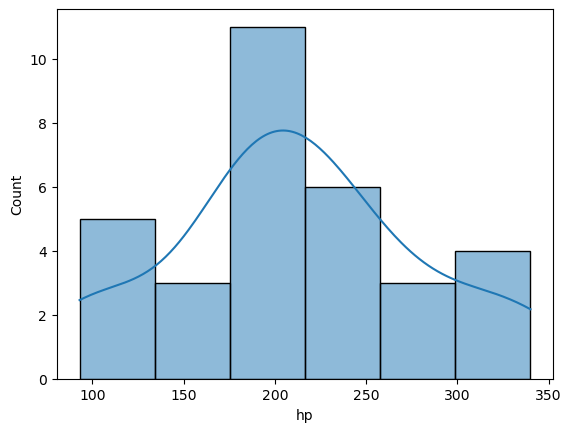

In [85]:
sb.histplot(df['hp'],kde=True)

In [ ]:
#population is nearly normal distribution.

<AxesSubplot:xlabel='hp', ylabel='Count'>

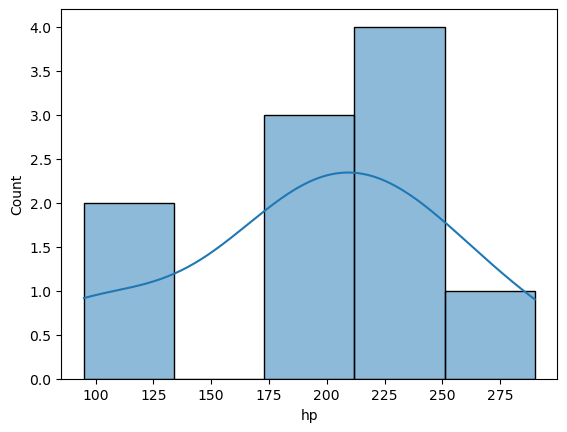

In [51]:
sb.histplot(s_10['hp'],kde=True)

In [ ]:
#conclusion:-s_10 has a left-skew.

<AxesSubplot:xlabel='hp', ylabel='Count'>

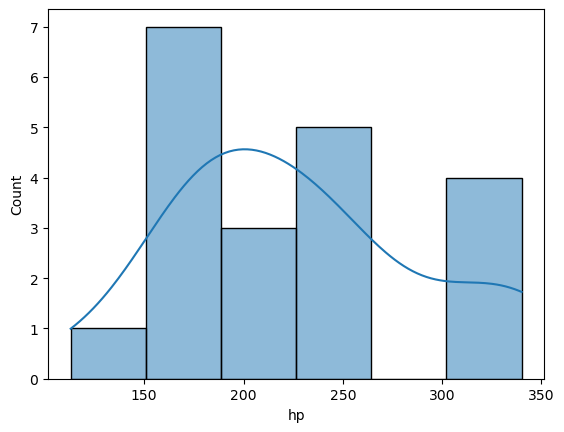

In [53]:
sb.histplot(s_20['hp'],kde=True)

In [ ]:
#s_20 has a right-skew.

<AxesSubplot:xlabel='hp', ylabel='Count'>

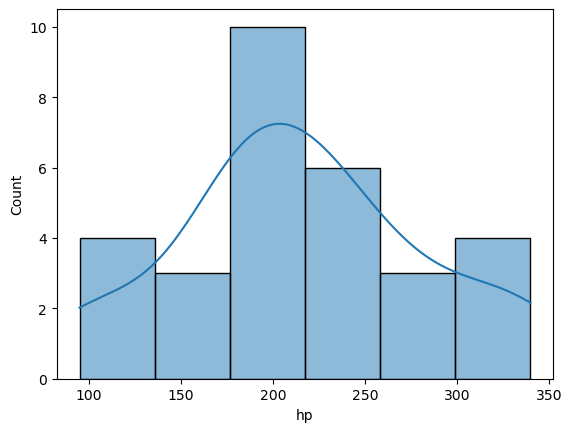

In [56]:
sb.histplot(s_30['hp'],kde=True)

In [ ]:
#s_30 has a normal distribution.

In [83]:
pop=[df['hp'].mean(),
df['hp'].median(),
df['hp'].std()]

In [63]:
s_10=[s_10['hp'].mean(),
s_10['hp'].median(),
s_10['hp'].std()]

In [66]:
s_20=[s_20['hp'].mean(),
s_20['hp'].median(),
s_20['hp'].std()]  

In [69]:
s_30=[s_30['hp'].mean(),
s_30['hp'].median(),
s_30['hp'].std()]

In [70]:
df1=pd.DataFrame()
df1['Measures']=['mean','median','std']
df1['population']=pop
df1['sample_10']=s_10
df1['sample_20']=s_20
df1['sample_30']=s_30


In [71]:
df1

,Measures,population,sample_10,sample_20,sample_30
0,mean,211.312500,198.900000,228.250000,215.300000
1,median,210.000000,192.500000,219.000000,210.000000
2,std,68.513449,72.813994,63.497928,67.220763


In [ ]:
#conclusion:-mean data and median data of sample_20 is highest.
#mode data of sample_10 is highest.